# Logistic Regression


## Project Setup

### Importing the Libraries 
- **LogisticRegression**: Module for implementing logistic regression, a method for binary classification

In [27]:
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module

# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Scikit-learn utilities

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Set up matplotlib for inline display
%matplotlib inline

### Importing the Data

In [28]:
import sys
import os

# To allow for importing of 'utils' module from parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from utils import import_data

dataset_path = "../data"
dataset_version = "automated-v1.0"

# Import the dataset (returns a dictionary)
automated_dataset = import_data(dataset_path, dataset_version)

# Extract the dataframe from the dictionary
df = automated_dataset['dataframe']

print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {df.columns.tolist()}")
df.head()

Dataset shape: (1400, 17)
Dataset columns: ['user_media_count', 'user_follower_count', 'user_following_count', 'user_has_highligh_reels', 'user_has_external_url', 'user_tags_count', 'follower_following_ratio', 'user_biography_length', 'username_length', 'username_digit_count', 'media_comment_numbers', 'media_comments_are_disabled', 'media_has_location_info', 'media_hashtag_numbers', 'media_like_numbers', 'mediaUpload_times', 'automated_behaviour']


,user_media_count,user_follower_count,user_following_count,user_has_highligh_reels,user_has_external_url,user_tags_count,follower_following_ratio,user_biography_length,username_length,username_digit_count,media_comment_numbers,media_comments_are_disabled,media_has_location_info,media_hashtag_numbers,media_like_numbers,mediaUpload_times,automated_behaviour
0,97,1612,7108,0,1,36,0.226787,133,12,0,"[5, 2, 10, 0, 3, 2, 2, 2, 4, 0, 0, 6, 6, 0, 2,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[10, 10, 12, 10, 13, 13, 10, 12, 10, 11, 11, 1...","[100, 78, 112, 78, 77, 111, 97, 95, 63, 83, 42...","[1540847457, 1540744841, 1538410400, 153729214...",1
1,863,3028,912,1,0,77,3.320175,99,11,0,"[3, 2, 3, 4, 7, 2, 0, 6, 2, 2, 1, 9, 2, 0, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[8, 11, 14, 17, 12, 10, 13, 14, 14, 11, 10, 11...","[229, 331, 180, 326, 313, 157, 245, 161, 182, ...","[1542664246, 1542569444, 1542564418, 154211928...",1
2,149,5213,1157,1,1,56,4.505618,120,18,0,"[12, 16, 37, 11, 3, 4, 2, 4, 5, 1, 1, 2, 3, 3,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[25, 25, 25, 25, 15, 15, 15, 5, 15, 10, 10, 10...","[237, 254, 350, 257, 180, 172, 141, 84, 218, 8...","[1543220394, 1542972220, 1542868998, 154278889...",1
3,33,12423,1763,0,0,2,7.046512,55,13,0,"[2, 2, 7, 14, 17, 3, 2, 5, 2, 1, 5, 5, 8, 1, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 14, 14, 0, 0...","[163, 30, 92, 111, 145, 110, 81, 81, 61, 60, 6...","[1543886933, 1543793413, 1543704343, 154344770...",1
4,1000,9496,2412,1,0,91,3.936982,33,8,0,"[4, 0, 13, 9, 9, 6, 16, 4, 25, 6, 3, 4, 16, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[4, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 2, 3, 1, 1, ...","[61, 222, 437, 829, 681, 440, 920, 256, 1017, ...","[1543939920, 1543699089, 1543187756, 154264414...",1


## 1. Data Preprocessing and Scaling

In this step, we'll preprocess the data by:
1. Identifying columns that contain lists
2. Converting list columns to numeric features
3. Scaling the numeric features for model training

In [29]:
def extract_timestamp_features(timestamps):
    # Sort timestamps
    sorted_timestamps = sorted(timestamps)
    
    # Calculate intervals between posts
    intervals = [sorted_timestamps[i+1] - sorted_timestamps[i] 
                for i in range(len(sorted_timestamps)-1)]
    
    # Key features
    features = {
        "interval_std": np.std(intervals),
    }
    
    return features

# Split into features and target
X = df.drop('automated_behaviour', axis=1)  
y = df['automated_behaviour']  

# Check for columns containing lists
list_columns = []
for col in X.columns:
    if isinstance(X[col].iloc[0], list):
        list_columns.append(col)

print(f"List columns that need preprocessing: {list_columns}")

# Process list columns to extract numeric features
X_processed = X.copy()

# Define binary and numeric columns
binary_columns = ['media_comments_are_disabled', 'media_has_location_info']
numeric_columns = ['media_comment_numbers', 'media_hashtag_numbers', 'media_like_numbers']

for i, col in enumerate(X_processed.columns, 1):
    print(f"{i}. {col}")
print(f"\nTotal number of features: {len(X_processed.columns)}")

for col in list_columns:
    if col == 'mediaUpload_times':  # Special handling for timestamps
        # Extract timestamp features
        X_processed[f'{col}_interval_std'] = X_processed[col].apply(
            lambda x: extract_timestamp_features(x)['interval_std'] if len(x) > 1 else 0
        )
        X_processed = X_processed.drop(col, axis=1)
    elif col in binary_columns:
        # For binary features, sum up the 1s
        X_processed[col] = X_processed[col].apply(np.sum)
    elif col in numeric_columns:
        # For numeric features, take the average
        X_processed[col] = X_processed[col].apply(lambda x: np.mean(x) if len(x) > 0 else 0)

# Splitting the dataset (20% Testing, 20% Validating, 60% Training)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_processed, y,   # Changed X to X_processed here
    test_size=0.2, 
    random_state=42, 
    shuffle=True, 
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, 
    test_size=0.25, 
    random_state=42, 
    shuffle=True, 
    stratify=y_train_val
)

print(np.unique(y_train, return_counts=True))

# Apply StandardScaler to the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)    # Added validation set scaling
X_test_scaled = scaler.transform(X_test)

# Print shapes to verify
print(f"Processed features shape: {X_processed.shape}")
print(f"Training features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")    # Added validation shape
print(f"Testing features shape: {X_test.shape}")
print(f"Scaled training data shape: {X_train_scaled.shape}")


for i, col in enumerate(X_processed.columns, 1):
    print(f"{i}. {col}")
print(f"\nTotal number of features: {len(X_processed.columns)}")

List columns that need preprocessing: ['media_comment_numbers', 'media_comments_are_disabled', 'media_has_location_info', 'media_hashtag_numbers', 'media_like_numbers', 'mediaUpload_times']
1. user_media_count
2. user_follower_count
3. user_following_count
4. user_has_highligh_reels
5. user_has_external_url
6. user_tags_count
7. follower_following_ratio
8. user_biography_length
9. username_length
10. username_digit_count
11. media_comment_numbers
12. media_comments_are_disabled
13. media_has_location_info
14. media_hashtag_numbers
15. media_like_numbers
16. mediaUpload_times

Total number of features: 16
(array([0, 1]), array([420, 420]))
Processed features shape: (1400, 16)
Training features shape: (840, 16)
Validation features shape: (280, 16)
Testing features shape: (280, 16)
Scaled training data shape: (840, 16)
1. user_media_count
2. user_follower_count
3. user_following_count
4. user_has_highligh_reels
5. user_has_external_url
6. user_tags_count
7. follower_following_ratio
8. use

## Data Exploration and Unsupervised Analysis

Exploring the dataset using unsupervised learning techniques and visualizations:
1. Analyze feature distributions and relationships with the target
2. Create correlation matrix of features
3. Apply PCA for dimensionality reduction
4. Use clustering to identify natural groupings in the data

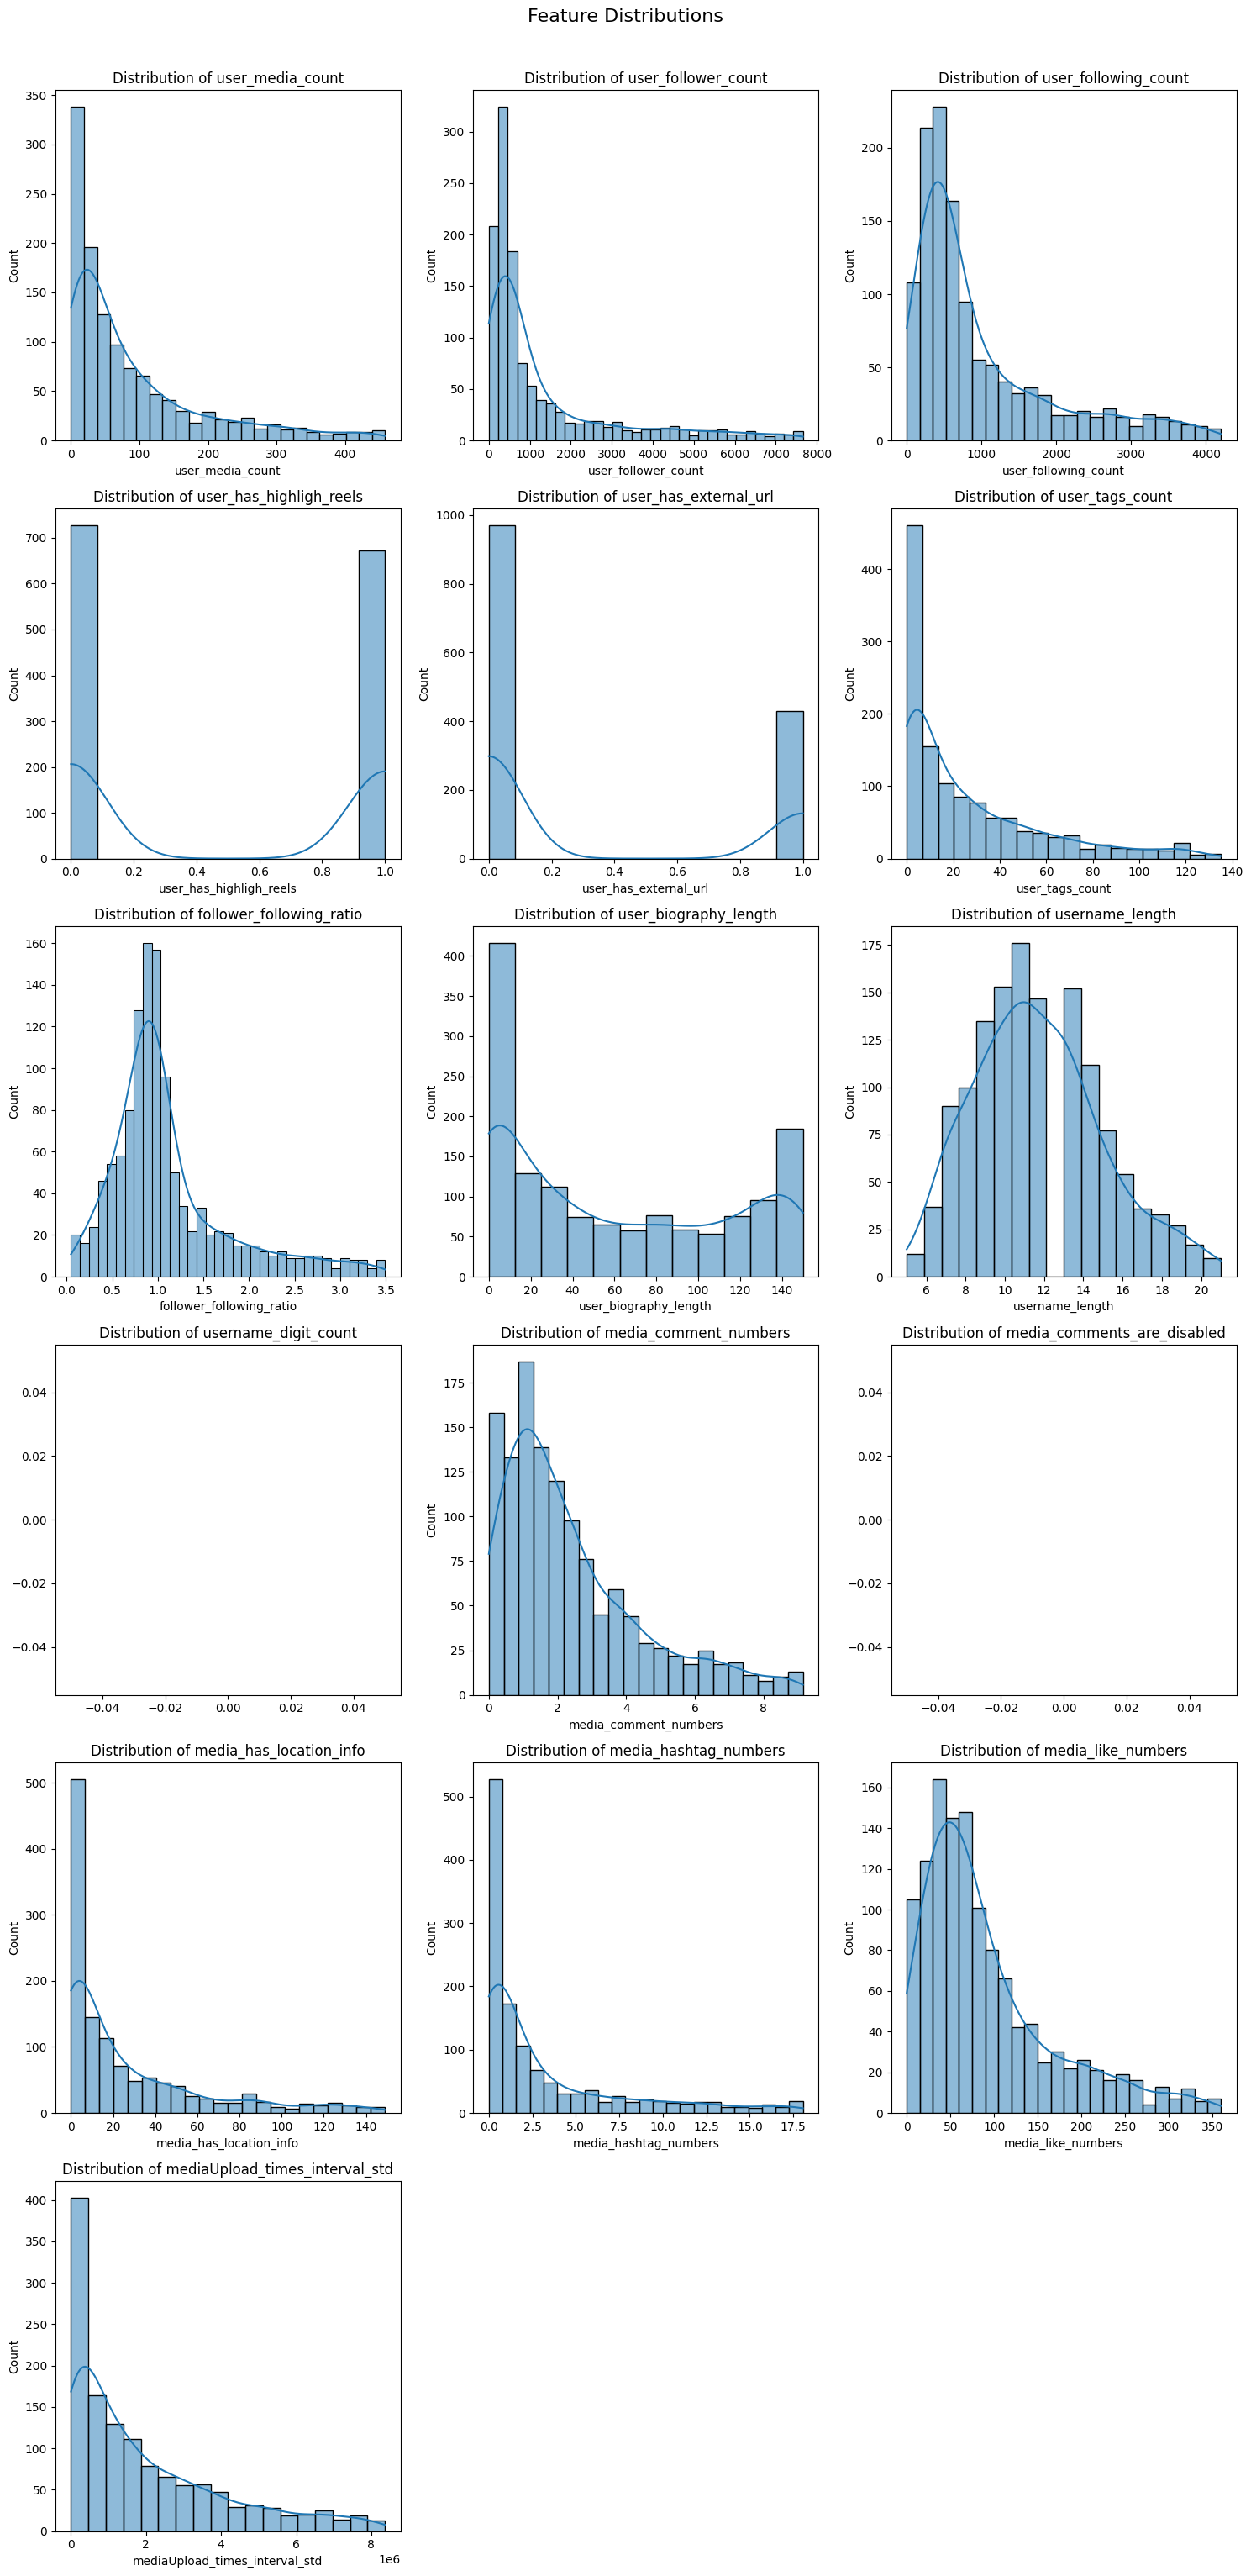

C:\Users\suisc\AppData\Local\Temp\ipykernel_8864\1385116936.py:38: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, upper_limit)
C:\Users\suisc\AppData\Local\Temp\ipykernel_8864\1385116936.py:38: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, upper_limit)


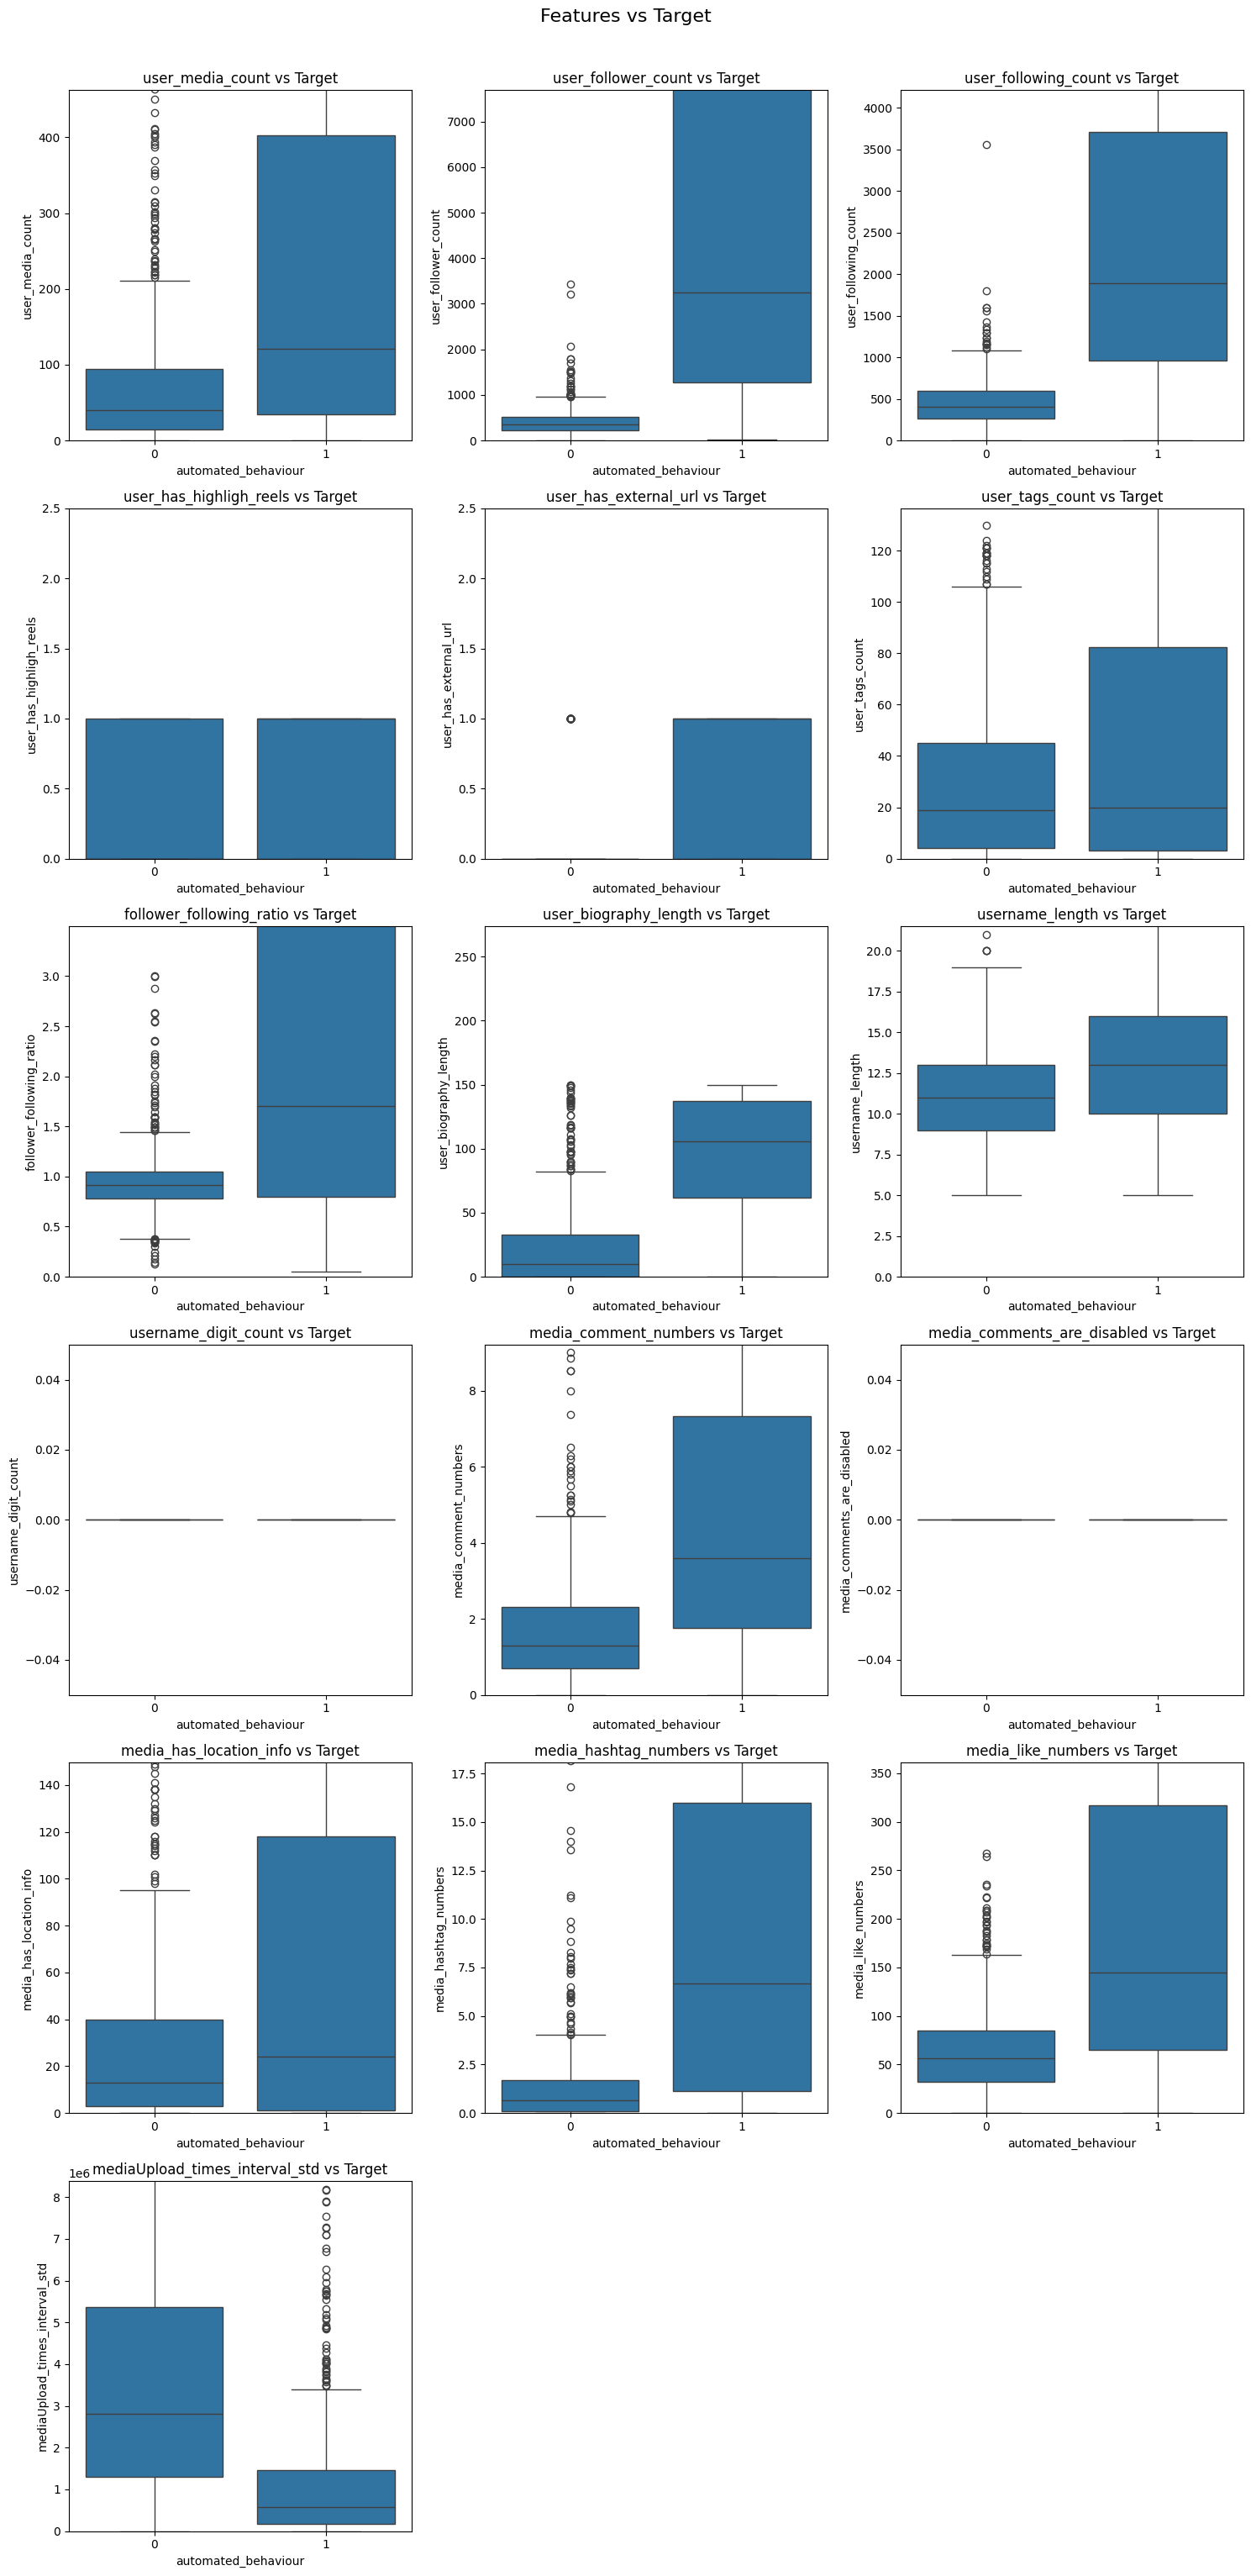

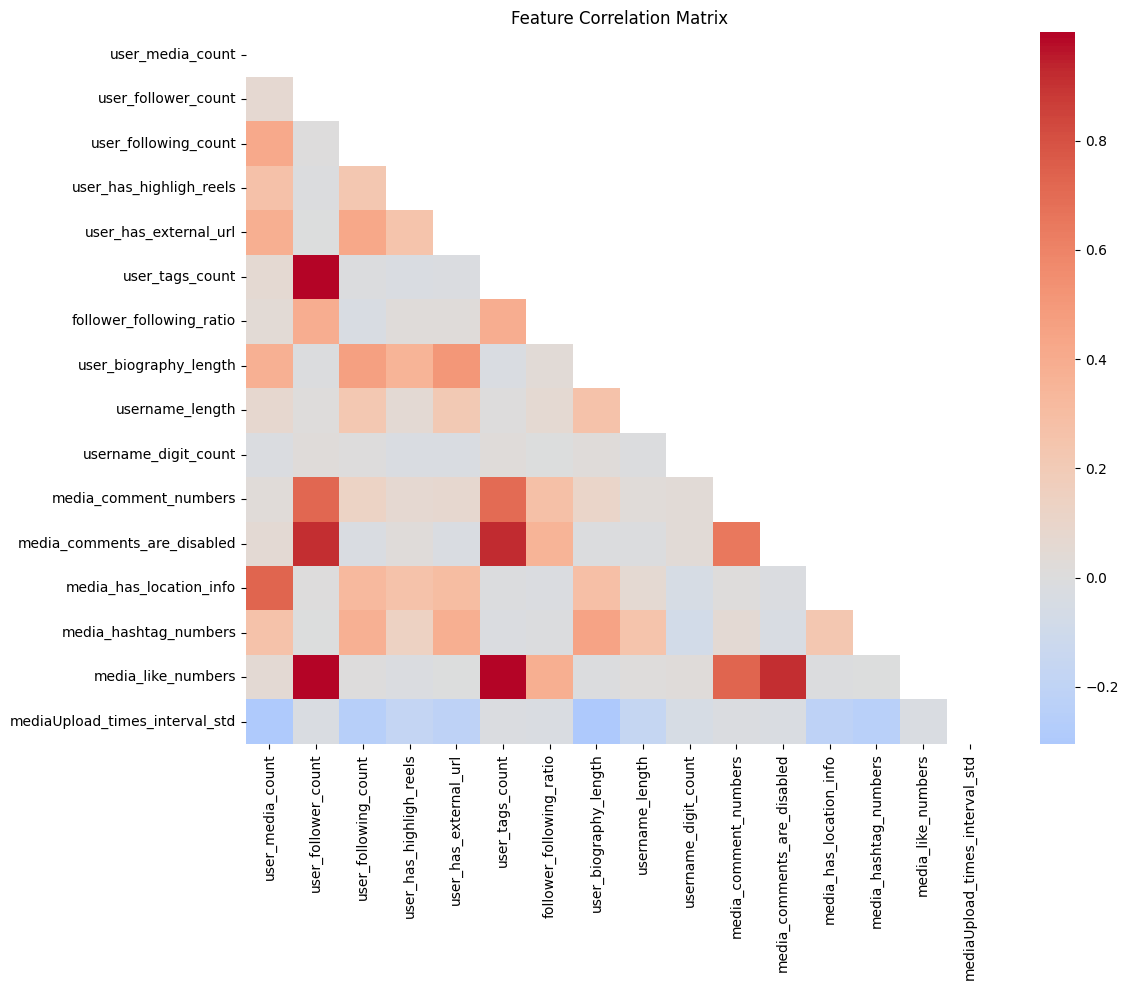

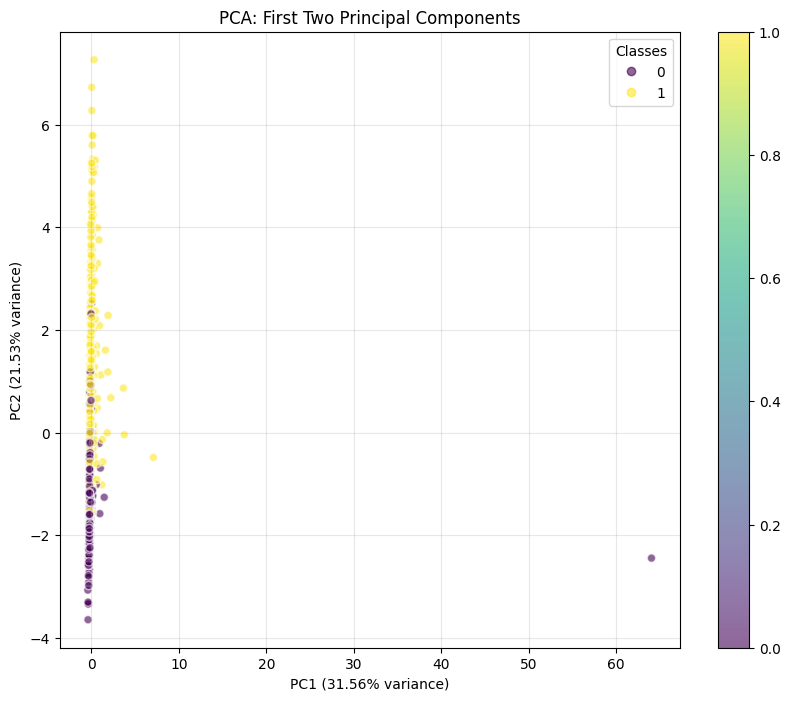

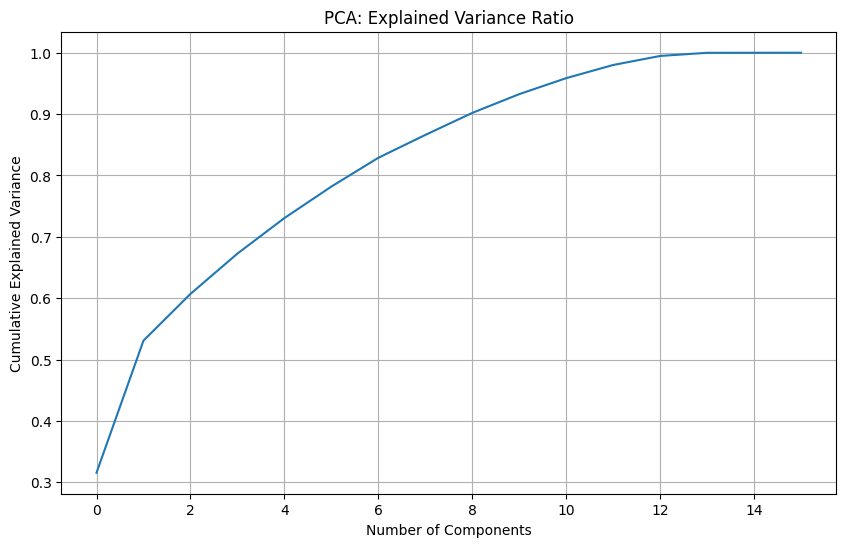

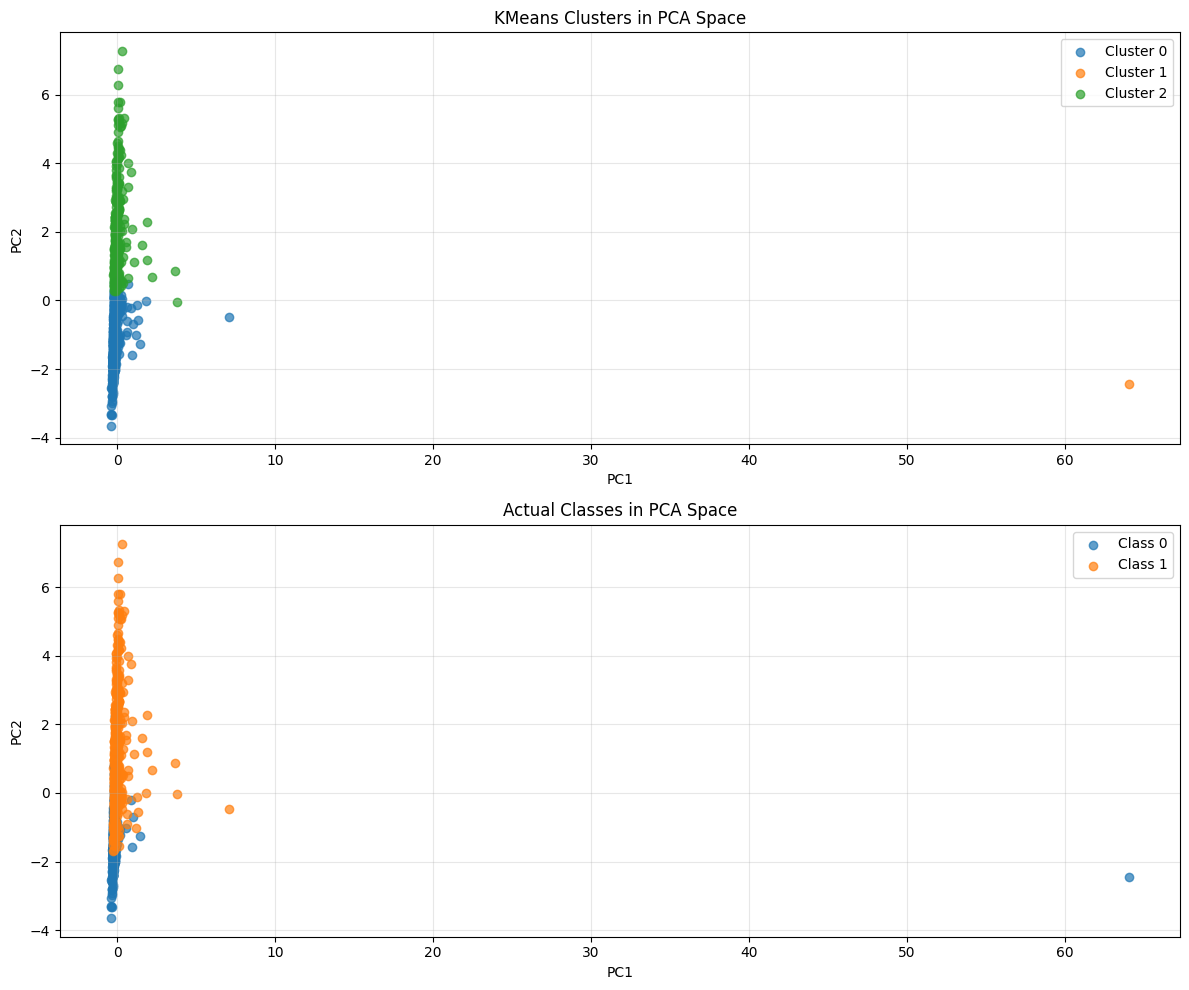

<Figure size 1000x600 with 0 Axes>

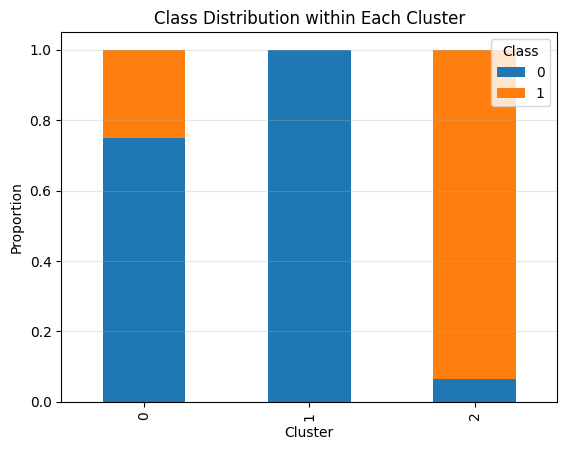


Data Exploration Insights:
- Total features: 16
- PCA shows that 7 components explain 80% of variance
- Top correlating features:
  user_follower_count and media_like_numbers: 0.998
  media_like_numbers and user_follower_count: 0.998
  user_tags_count and user_follower_count: 0.998
  user_follower_count and user_tags_count: 0.998
  media_like_numbers and user_tags_count: 0.998


In [30]:
X_numerical = X_processed.copy()

# 1. Visualize all feature distributions
n_features = len(X_numerical.columns)
n_rows = (n_features + 2) // 3  # Calculate needed rows (ceiling division by 3)

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(X_numerical.columns):
    plt.subplot(n_rows, 3, i+1)
    
    # Get the data for this feature
    data = X_numerical[col]
    
    # Calculate reasonable limits (removing extreme outliers)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    
    # Create histogram with adjusted axis
    sns.histplot(data[data < upper_limit], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.suptitle('Feature Distributions', y=1.02, fontsize=16)
plt.show()

# 2. Visualize relationship between all features and target
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(X_numerical.columns):
    plt.subplot(n_rows, 3, i+1)
    
    # Calculate reasonable y-axis limits
    q1, q3 = np.percentile(X_numerical[col], [25, 75])
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    
    # Create boxplot with adjusted y-axis
    sns.boxplot(x=y, y=X_numerical[col])
    plt.ylim(0, upper_limit)
    plt.title(f'{col} vs Target')
    plt.tight_layout()
plt.suptitle('Features vs Target', y=1.02, fontsize=16)
plt.show()

# 3. Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = X_numerical.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# 4. PCA analysis
# Standardize data for PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Visualize PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6, edgecolors='w')
plt.title('PCA: First Two Principal Components')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.colorbar(scatter)
plt.grid(alpha=0.3)
plt.show()

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
pca_full = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance Ratio')
plt.grid(True)
plt.show()

# 5. Clustering analysis - use a fixed number of clusters (3) without silhouette scoring
k = 3  # Using 3 clusters as a simple example
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_scaled)

# Visualize clusters in PCA space
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
for i in range(k):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], 
                label=f'Cluster {i}', alpha=0.7)
plt.title('KMeans Clusters in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)

# Compare clusters with actual classes
plt.subplot(2, 1, 2)
for i in np.unique(y_train):
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], 
                label=f'Class {i}', alpha=0.7)
plt.title('Actual Classes in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Analyze cluster vs. class distribution
cluster_class_df = pd.DataFrame({'Cluster': cluster_labels, 'Class': y_train})
cluster_class_counts = pd.crosstab(cluster_class_df['Cluster'], 
                                   cluster_class_df['Class'], 
                                   normalize='index')

plt.figure(figsize=(10, 6))
cluster_class_counts.plot(kind='bar', stacked=True)
plt.title('Class Distribution within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Class')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 7. Summarize findings
print("\nData Exploration Insights:")
print(f"- Total features: {X_numerical.shape[1]}")
print(f"- PCA shows that {np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.8) + 1} components explain 80% of variance")
print("- Top correlating features:")
top_correlations = correlation_matrix.unstack().sort_values(ascending=False)
top_correlations = top_correlations[top_correlations < 1].head(5)
for pair, corr in top_correlations.items():
    print(f"  {pair[0]} and {pair[1]}: {corr:.3f}")

## Drop the irrelevant data features

In [31]:
columns_to_drop = ['media_comments_are_disabled', 'username_digit_count']
X_processed = X_processed.drop(columns=columns_to_drop)
print("\nColumns in X_processed:")
for i, col in enumerate(X_processed.columns, 1):
    print(f"{i}. {col}")
print(f"\nTotal number of features: {len(X_processed.columns)}")


Columns in X_processed:
1. user_media_count
2. user_follower_count
3. user_following_count
4. user_has_highligh_reels
5. user_has_external_url
6. user_tags_count
7. follower_following_ratio
8. user_biography_length
9. username_length
10. media_comment_numbers
11. media_has_location_info
12. media_hashtag_numbers
13. media_like_numbers
14. mediaUpload_times_interval_std

Total number of features: 14


## 2. Logistic Regression with Gradient Ascent

Implementing logistic regression with gradient ascent:
1. Initialize model parameters
2. Implement sigmoid function and log-likelihood calculation
3. Use gradient ascent to find optimal weights
4. Track learning progress with log-likelihood

In [50]:
class LogisticRegressionGradientAscent:
    def __init__(self, learning_rate=0.01, num_iterations=1000, reg_lambda=0.0):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.reg_lambda = reg_lambda  # L2 regularization strength
        self.weights = None
        self.bias = 0
        self.log_likelihoods = []
        self.val_accuracies = []
        self.best_weights = None
        self.best_bias = None
        self.best_val_accuracy = -np.inf

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def compute_log_likelihood(self, X, y):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        epsilon = 1e-15
        predictions = np.clip(predictions, epsilon, 1 - epsilon)
        log_likelihood = np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        # L2 penalty
        log_likelihood -= (self.reg_lambda / 2) * np.sum(self.weights ** 2)
        return log_likelihood

    def compute_gradients(self, X, y):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        error = y - predictions
        dw = np.dot(X.T, error) / len(y) - self.reg_lambda * self.weights
        db = np.sum(error) / len(y)
        return dw, db

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y).flatten()
        m, n = X.shape
        self.initialize_parameters(n)
        self.log_likelihoods = []

        for i in range(self.num_iterations):
            dw, db = self.compute_gradients(X, y)
            self.weights += self.learning_rate * dw
            self.bias += self.learning_rate * db
            if i % 100 == 0:
                log_likelihood = self.compute_log_likelihood(X, y)
                self.log_likelihoods.append(log_likelihood)
        return self

    def fit_with_validation(self, X_train, y_train, X_val, y_val, val_check_interval=100):
        X_train = np.asarray(X_train)
        y_train = np.asarray(y_train).flatten()
        X_val = np.asarray(X_val)
        y_val = np.asarray(y_val).flatten()
        m, n = X_train.shape
        self.initialize_parameters(n)
        self.log_likelihoods = []
        self.val_accuracies = []
        self.best_val_accuracy = -np.inf

        for i in range(self.num_iterations):
            dw, db = self.compute_gradients(X_train, y_train)
            self.weights += self.learning_rate * dw
            self.bias += self.learning_rate * db
            if i % val_check_interval == 0 or i == self.num_iterations - 1:
                log_likelihood = self.compute_log_likelihood(X_train, y_train)
                self.log_likelihoods.append(log_likelihood)
                val_acc = self.evaluate(X_val, y_val)
                self.val_accuracies.append(val_acc)
                if val_acc > self.best_val_accuracy:
                    self.best_val_accuracy = val_acc
                    self.best_weights = self.weights.copy()
                    self.best_bias = self.bias
                #print(f"Iter {i}: Train LL={log_likelihood:.4f}, Val Acc={val_acc:.4f}")

        # Restore best weights
        if self.best_weights is not None:
            self.weights = self.best_weights
            self.bias = self.best_bias
        print(f"Best validation accuracy: {self.best_val_accuracy:.4f}")
        return self

    def predict_proba(self, X):
        X = np.asarray(X)
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def evaluate(self, X, y):
        y = np.asarray(y).flatten()
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

## Penalty Term C

In [41]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

## 3. Model Training and Evaluation

Training the logistic regression model and evaluating performance:
1. Train the model on processed data
2. Evaluate on training and test sets
3. Visualize learning progress


Results Table:
      C  Train Accuracy  Train Precision  Train Recall  Val Accuracy  Val Precision  Val Recall
  0.001        0.869048         0.910053      0.819048      0.871429       0.948276    0.785714
  0.010        0.885714         0.913265      0.852381      0.892857       0.943548    0.835714
  0.100        0.900000         0.922111      0.873810      0.896429       0.944000    0.842857
  1.000        0.917857         0.933333      0.900000      0.914286       0.960317    0.864286
 10.000        0.917857         0.927007      0.907143      0.917857       0.960630    0.871429
100.000        0.916667         0.926829      0.904762      0.921429       0.968254    0.871429


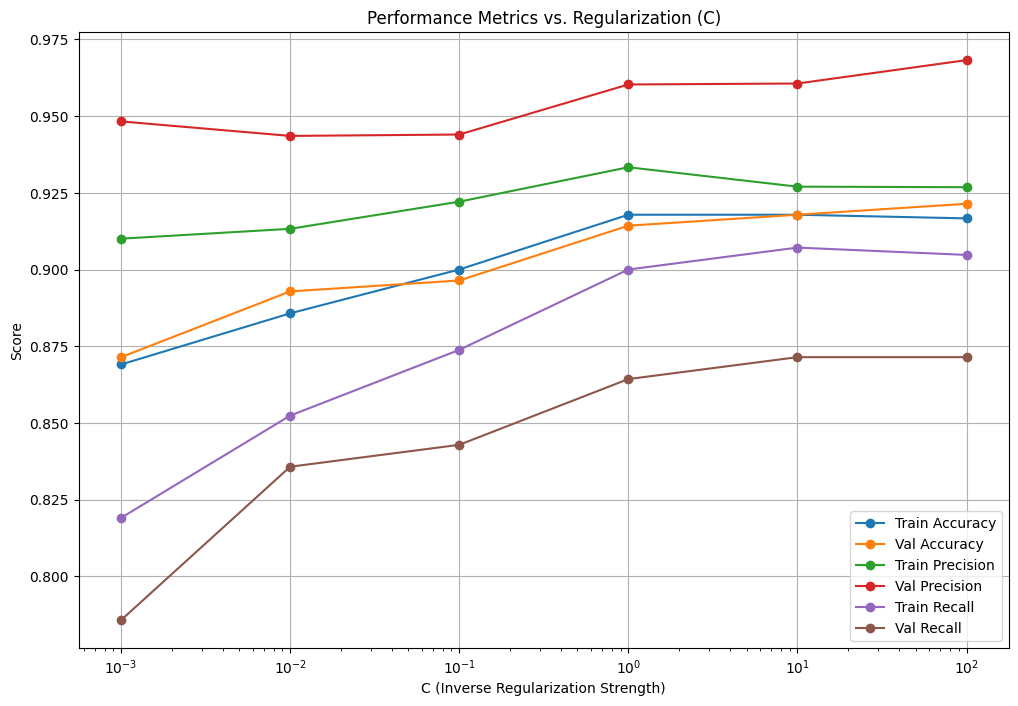

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt

c_values = [0.001, 0.01, 0.1, 1, 10, 100]  # Or your preferred C values

results = []

for c in c_values:
    model = LogisticRegression(
        C=c,
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)

    # Training metrics
    y_train_pred = model.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred, zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, zero_division=0)

    # Validation metrics
    y_val_pred = model.predict(X_val_scaled)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_prec = precision_score(y_val, y_val_pred, zero_division=0)
    val_rec = recall_score(y_val, y_val_pred, zero_division=0)

    results.append({
        'C': c,
        'Train Accuracy': train_acc,
        'Train Precision': train_prec,
        'Train Recall': train_rec,
        'Val Accuracy': val_acc,
        'Val Precision': val_prec,
        'Val Recall': val_rec
    })

# Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("\nResults Table:")
print(results_df.to_string(index=False))

# Plotting metrics vs. C
plt.figure(figsize=(12, 8))
plt.plot(results_df['C'], results_df['Train Accuracy'], marker='o', label='Train Accuracy')
plt.plot(results_df['C'], results_df['Val Accuracy'], marker='o', label='Val Accuracy')
plt.plot(results_df['C'], results_df['Train Precision'], marker='o', label='Train Precision')
plt.plot(results_df['C'], results_df['Val Precision'], marker='o', label='Val Precision')
plt.plot(results_df['C'], results_df['Train Recall'], marker='o', label='Train Recall')
plt.plot(results_df['C'], results_df['Val Recall'], marker='o', label='Val Recall')
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Regularization (C)')
plt.legend()
plt.grid(True)
plt.show()

## Training with Regularization


=== Results for C=0.001 ===
Training accuracy: 0.8690
Validation accuracy: 0.8714
Testing accuracy: 0.8893

=== Results for C=0.01 ===
Training accuracy: 0.8857
Validation accuracy: 0.8929
Testing accuracy: 0.8964

=== Results for C=0.1 ===
Training accuracy: 0.9000
Validation accuracy: 0.8964
Testing accuracy: 0.9179

=== Results for C=1 ===
Training accuracy: 0.9179
Validation accuracy: 0.9143
Testing accuracy: 0.9393

=== Results for C=10 ===
Training accuracy: 0.9179
Validation accuracy: 0.9179
Testing accuracy: 0.9250

=== Results for C=100 ===
Training accuracy: 0.9167
Validation accuracy: 0.9214
Testing accuracy: 0.9250

Best for Original Features:
  C=100, Val Accuracy=0.9214, Test Accuracy=0.9250
  Final Validation Precision: 0.9683
  Final Validation Recall:    0.8714


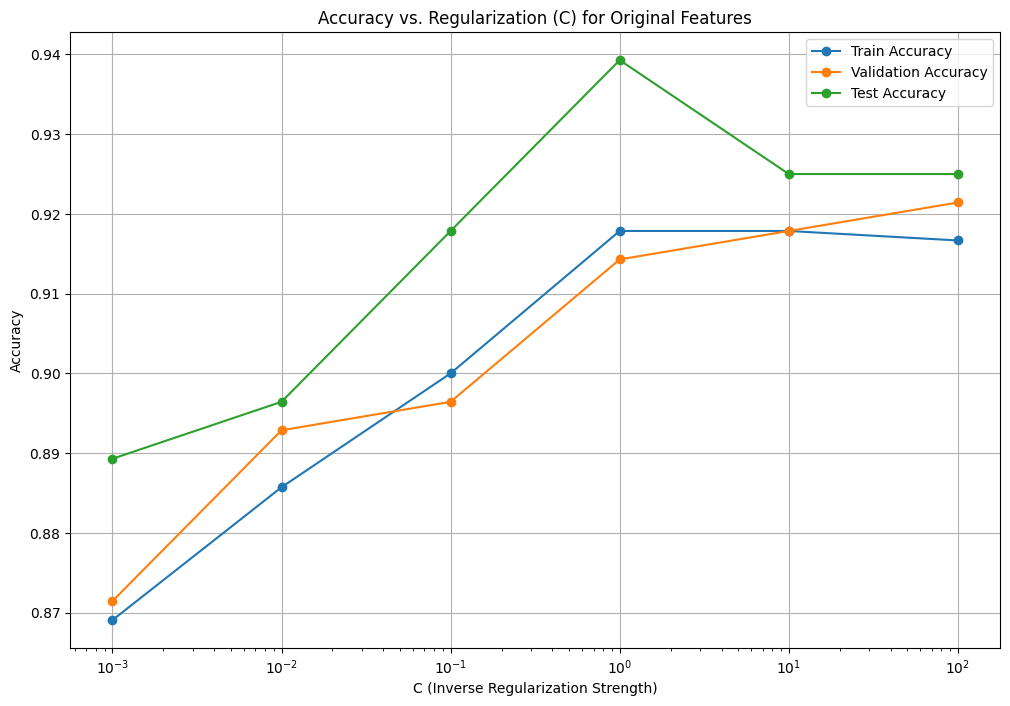

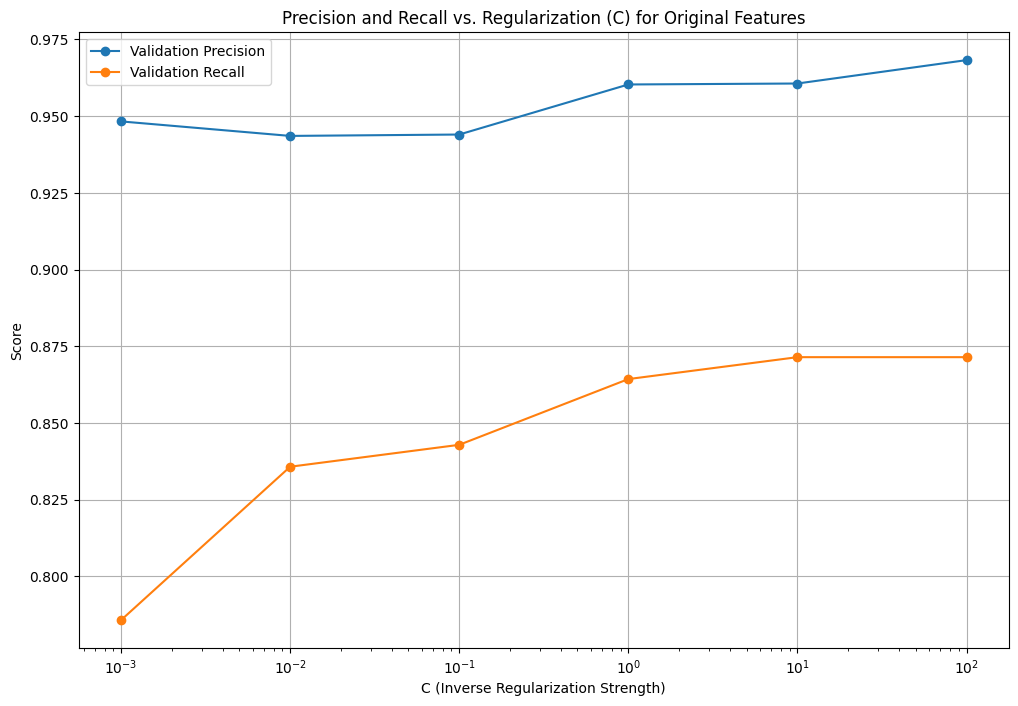

<Figure size 400x400 with 0 Axes>

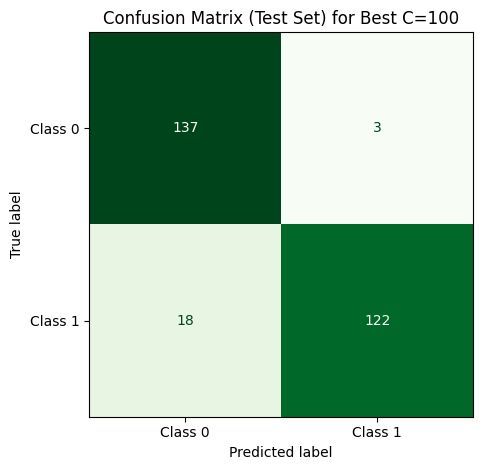

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

best_val_acc = -np.inf
best_c = None
best_val_prec = None
best_val_rec = None
best_test_acc = None

for c in c_values:
    print(f"\n=== Results for C={c} ===")
    model = LogisticRegression(
        C=c,
        penalty='l2',
        solver='lbfgs',
        max_iter=2000,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    val_accuracy = model.score(X_val_scaled, y_val)
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f"Training accuracy: {train_accuracy:.4f}")
    print(f"Validation accuracy: {val_accuracy:.4f}")
    print(f"Testing accuracy: {test_accuracy:.4f}")

    # Track best validation accuracy and corresponding precision/recall
    y_val_pred = model.predict(X_val_scaled)
    val_prec = precision_score(y_val, y_val_pred, zero_division=0)
    val_rec = recall_score(y_val, y_val_pred, zero_division=0)
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        best_c = c
        best_val_prec = val_prec
        best_val_rec = val_rec
        best_test_acc = test_accuracy

print(f"\nBest for Original Features:")
print(f"  C={best_c}, Val Accuracy={best_val_acc:.4f}, Test Accuracy={best_test_acc:.4f}")
print(f"  Final Validation Precision: {best_val_prec:.4f}")
print(f"  Final Validation Recall:    {best_val_rec:.4f}")



# Store metrics for plotting
train_accuracies = []
val_accuracies = []
test_accuracies = []
val_precisions = []
val_recalls = []

for c in c_values:
    model = LogisticRegression(
        C=c,
        penalty='l2',
        solver='lbfgs',
        max_iter=2000,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    train_accuracies.append(model.score(X_train_scaled, y_train))
    val_accuracies.append(model.score(X_val_scaled, y_val))
    test_accuracies.append(model.score(X_test_scaled, y_test))
    y_val_pred = model.predict(X_val_scaled)
    val_precisions.append(precision_score(y_val, y_val_pred, zero_division=0))
    val_recalls.append(recall_score(y_val, y_val_pred, zero_division=0))

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(c_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(c_values, val_accuracies, marker='o', label='Validation Accuracy')
plt.plot(c_values, test_accuracies, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization (C) for Original Features')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(c_values, val_precisions, marker='o', label='Validation Precision')
plt.plot(c_values, val_recalls, marker='o', label='Validation Recall')
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Regularization (C) for Original Features')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import ConfusionMatrixDisplay

# Re-train the best model on the original features
best_model = LogisticRegression(
    C=best_c,
    penalty='l2',
    solver='lbfgs',
    max_iter=2000,
    random_state=42
)
best_model.fit(X_train_scaled, y_train)
y_test_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(4, 4))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    display_labels=['Class 0', 'Class 1'],
    cmap='Greens',
    colorbar=False
)
plt.title(f'Confusion Matrix (Test Set) for Best C={best_c}')
plt.tight_layout()
plt.show()


Best for Polynomial:
  C=1, Val Accuracy=0.9179, Test Accuracy=0.9393
  Final Validation Precision: 0.9606
  Final Validation Recall:    0.8714

Best for Logarithmic:
  C=100, Val Accuracy=0.9214, Test Accuracy=0.9321
  Final Validation Precision: 0.9609
  Final Validation Recall:    0.8786

Best for Square Root:
  C=100, Val Accuracy=0.9214, Test Accuracy=0.9321
  Final Validation Precision: 0.9609
  Final Validation Recall:    0.8786

Results Table:
Transformation       C  Train Accuracy  Val Accuracy  Test Accuracy
    Polynomial   0.001        0.867857      0.867857       0.857143
    Polynomial   0.010        0.892857      0.896429       0.907143
    Polynomial   0.100        0.920238      0.914286       0.939286
    Polynomial   1.000        0.946429      0.917857       0.939286
    Polynomial  10.000        0.953571      0.914286       0.935714
    Polynomial 100.000        0.959524      0.914286       0.928571
   Logarithmic   0.001        0.870238      0.857143       0.903571

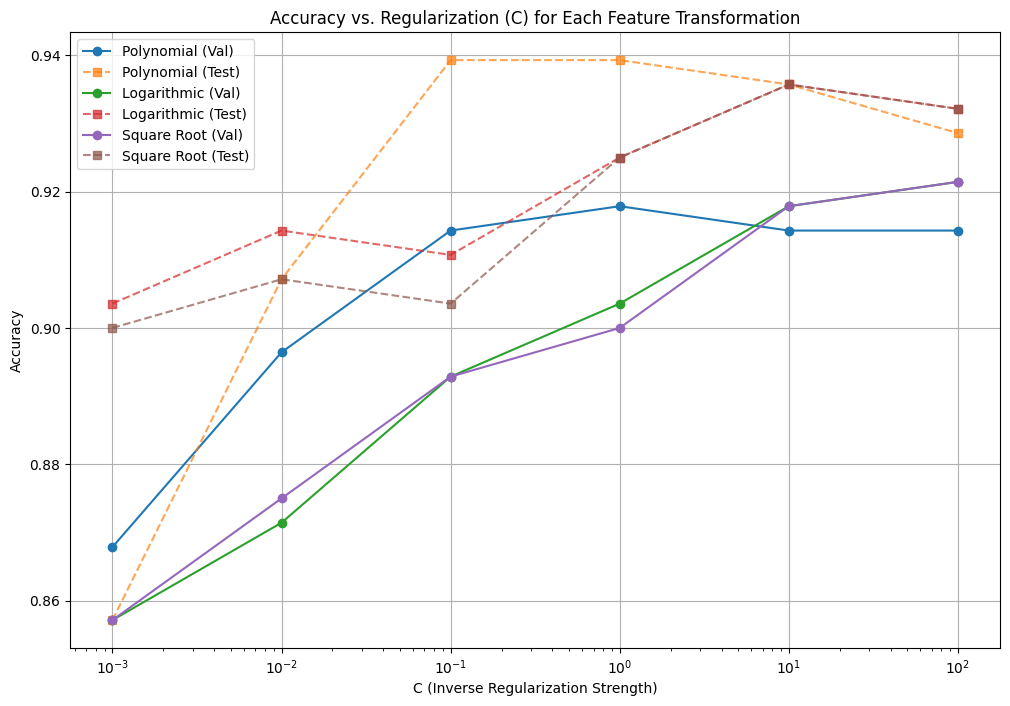


Confusion Matrix for Polynomial Transformation (Best Validation Accuracy, Test Set):


<Figure size 400x400 with 0 Axes>

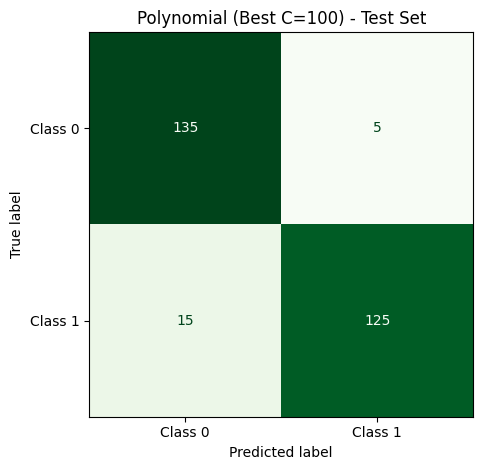


Confusion Matrix for Logarithmic Transformation (Best Validation Accuracy, Test Set):


<Figure size 400x400 with 0 Axes>

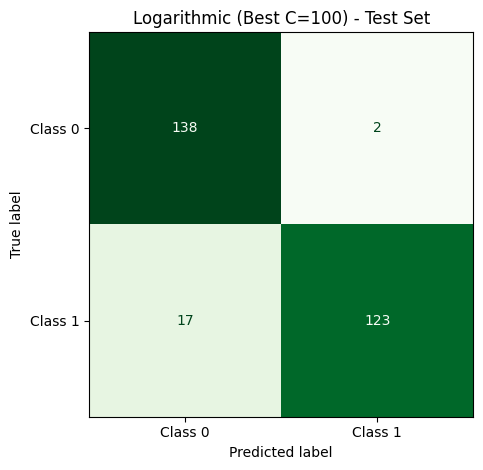


Confusion Matrix for Square Root Transformation (Best Validation Accuracy, Test Set):


<Figure size 400x400 with 0 Axes>

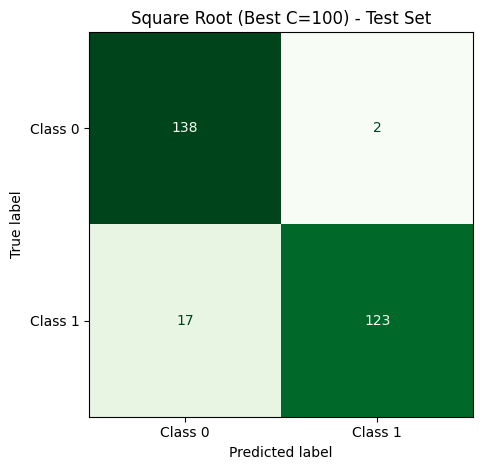

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Prepare transformed datasets
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

X_train_log = np.log1p(X_train_scaled - X_train_scaled.min(axis=0) + 1)
X_val_log = np.log1p(X_val_scaled - X_train_scaled.min(axis=0) + 1)
X_test_log = np.log1p(X_test_scaled - X_train_scaled.min(axis=0) + 1)

X_train_sqrt = np.sqrt(X_train_scaled - X_train_scaled.min(axis=0) + 1)
X_val_sqrt = np.sqrt(X_val_scaled - X_train_scaled.min(axis=0) + 1)
X_test_sqrt = np.sqrt(X_test_scaled - X_train_scaled.min(axis=0) + 1)

transformations = {
    'Polynomial': (X_train_poly, X_val_poly, X_test_poly),
    'Logarithmic': (X_train_log, X_val_log, X_test_log),
    'Square Root': (X_train_sqrt, X_val_sqrt, X_test_sqrt)
}

all_results = []
all_val_preds = {}  # (trans_name, c) -> y_val_pred
all_test_preds = {} # (trans_name, c) -> y_test_pred

for trans_name, (Xtr, Xv, Xte) in transformations.items():
    best_val_acc = -np.inf
    best_c = None
    best_val_prec = None
    best_val_rec = None
    best_test_acc = None
    for c in c_values:
        model = LogisticRegression(
            C=c,
            solver='lbfgs',
            max_iter=1000,
            random_state=42
        )
        model.fit(Xtr, y_train)
        # Training metrics
        y_train_pred = model.predict(Xtr)
        train_acc = accuracy_score(y_train, y_train_pred)
        # Validation metrics
        y_val_pred = model.predict(Xv)
        val_acc = accuracy_score(y_val, y_val_pred)
        # Test metrics
        y_test_pred = model.predict(Xte)
        test_acc = accuracy_score(y_test, y_test_pred)
        all_results.append({
            'Transformation': trans_name,
            'C': c,
            'Train Accuracy': train_acc,
            'Val Accuracy': val_acc,
            'Test Accuracy': test_acc
        })
        # Store predictions for confusion matrices
        all_val_preds[(trans_name, c)] = y_val_pred
        all_test_preds[(trans_name, c)] = y_test_pred
        # Track best validation accuracy for this transformation
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_c = c
            best_val_prec = precision_score(y_val, y_val_pred, zero_division=0)
            best_val_rec = recall_score(y_val, y_val_pred, zero_division=0)
            best_test_acc = test_acc
    print(f"\nBest for {trans_name}:")
    print(f"  C={best_c}, Val Accuracy={best_val_acc:.4f}, Test Accuracy={best_test_acc:.4f}")
    print(f"  Final Validation Precision: {best_val_prec:.4f}")
    print(f"  Final Validation Recall:    {best_val_rec:.4f}")

# Convert to DataFrame
results_df = pd.DataFrame(all_results)
print("\nResults Table:")
print(results_df.to_string(index=False))

# Plotting
for metric in ['Accuracy']:
    plt.figure(figsize=(12, 8))
    for trans_name in transformations.keys():
        subset = results_df[results_df['Transformation'] == trans_name]
        plt.plot(subset['C'], subset[f'Val {metric}'], marker='o', linestyle='-', label=f'{trans_name} (Val)')
        plt.plot(subset['C'], subset[f'Test {metric}'], marker='s', linestyle='--', alpha=0.7, label=f'{trans_name} (Test)')
    plt.xscale('log')
    plt.xlabel('C (Inverse Regularization Strength)')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. Regularization (C) for Each Feature Transformation')
    plt.legend()
    plt.grid(True)
    plt.show()

# Confusion matrices for each transformation and C (Validation and Test)
for trans_name, (Xtr, Xv, Xte) in transformations.items():
    # Find the best C for this transformation (already tracked in the loop)
    # Re-train the model with best C (optional, but predictions are already stored)
    print(f"\nConfusion Matrix for {trans_name} Transformation (Best Validation Accuracy, Test Set):")
    # Use the stored predictions for the best C
    y_test_pred_best = all_test_preds[(trans_name, best_c)]
    plt.figure(figsize=(4, 4))
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_test_pred_best,
        display_labels=['Class 0', 'Class 1'],
        cmap='Greens',
        colorbar=False
    )
    plt.title(f'{trans_name} (Best C={best_c}) - Test Set')
    plt.tight_layout()
    plt.show()